# Machine Learning Basics with Sklearn

First some imports for the notebook and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Choosing a dataset

First of all you need a dataset to work on. To keep things simple we will use the iris dataset provided with scikit.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

## Splitting the dataset

The dataset needs to be split into a training and test dataset.

This is done to first train our model and then test how good it is on data it has never seen before.

In [3]:
test_idx = [0, 50, 100]

train_y = np.delete(iris.target, test_idx)
train_X = np.delete(iris.data, test_idx, axis=0)

test_y = iris.target[test_idx]
test_X = iris.data[test_idx]

## Decision Tree Classifier

We will use a simple decision tree as the first model and train it.

In [4]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X,train_y)

### Visualize the decision tree

Whereas the decision tree is a simple graph we can visualize it quite simple.

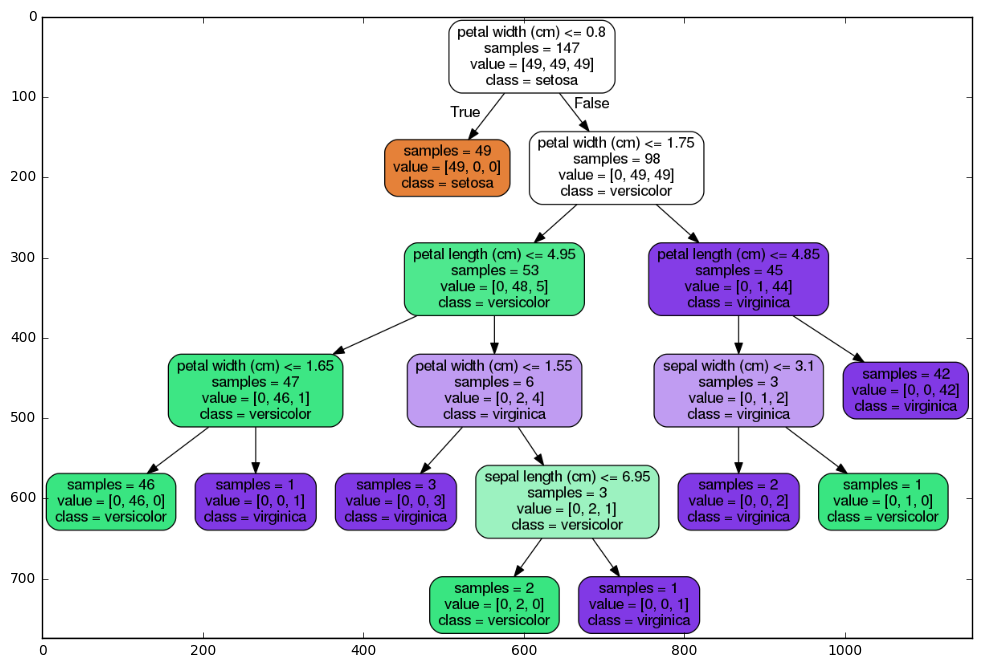

In [5]:
from sklearn.externals.six import StringIO
import pydot
import matplotlib.image as mpimg

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names,
        class_names=iris.target_names,
        filled=True, rounded=True, impurity=False)

pydot_graph = pydot.graph_from_dot_data(dot_data.getvalue())
png_str = pydot_graph.create_png(prog='dot')

# treat the dot output string as an image file
sio = StringIO()
sio.write(png_str)
sio.seek(0)
img = mpimg.imread(sio)

# plot the image
f, axes = plt.subplots(1, 1, figsize=(12,12))
imgplot = axes.imshow(img, aspect='equal')
plt.show()

## Evaluating the model

After the model is trained it has to be evaluated.

In [6]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y, clf.predict(test_X)))

1.0


## KNN-Classifier

Let's try another classifier. Initialize, train, print error.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf = clf.fit(train_X,train_y)
print(accuracy_score(test_y, clf.predict(test_X)))

1.0


## Implementing your own KNN

Let's implement a simple knn classifier with k=1.

We have to implement the fit method and the predict method.

Then initialize, train and print error.

In [8]:
from scipy.spatial import distance

class ScrappyKNN(object):
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        return self

    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions

    def closest(self, row):
        best_dist = distance.euclidean(row, self.X_train[0])
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = distance.euclidean(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i

        return self.y_train[best_index]
    
clf = ScrappyKNN()
clf = clf.fit(train_X,train_y)
print(accuracy_score(test_y, clf.predict(test_X)))

1.0
